AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  D 		  R
-------------------------------------
| 4.6 		 0.27 		 0.35 |
| 5.3 		 0.38 		 0.43 |
| 5.4 		 0.42 		 0.37 |
| 5.0 		 0.28 		 0.45 |
| 5.5 		 0.21 		 0.45 |
| 5.5 		 0.2 		 0.37 |
| 5.1 		 0.31 		 0.35 |
| 4.7 		 0.31 		 0.39 |
| 5.0 		 0.21 		 0.43 |
| 4.0 		 0.29 		 0.44 |
| 5.6 		 0.29 		 0.4 |
| 4.9 		 0.33 		 0.45 |
| 6.0 		 0.23 		 0.36 |
| 4.0 		 0.28 		 0.4 |
| 4.4 		 0.32 		 0.41 |
| 5.1 		 0.34 		 0.44 |
| 4.5 		 0.29 		 0.39 |
| 6.6 		 0.26 		 0.47 |
| 4.9 		 0.32 		 0.22 |
-------------------------------------
The s.d. of M is: 0.5
The s.d. of D is: 0.05
The s.d. of R is: 0.06
-------------------------------------
The mean of M is: 5.08
The mean of D is: 0.41
The mean of R is: 0.3
-------------------------------------


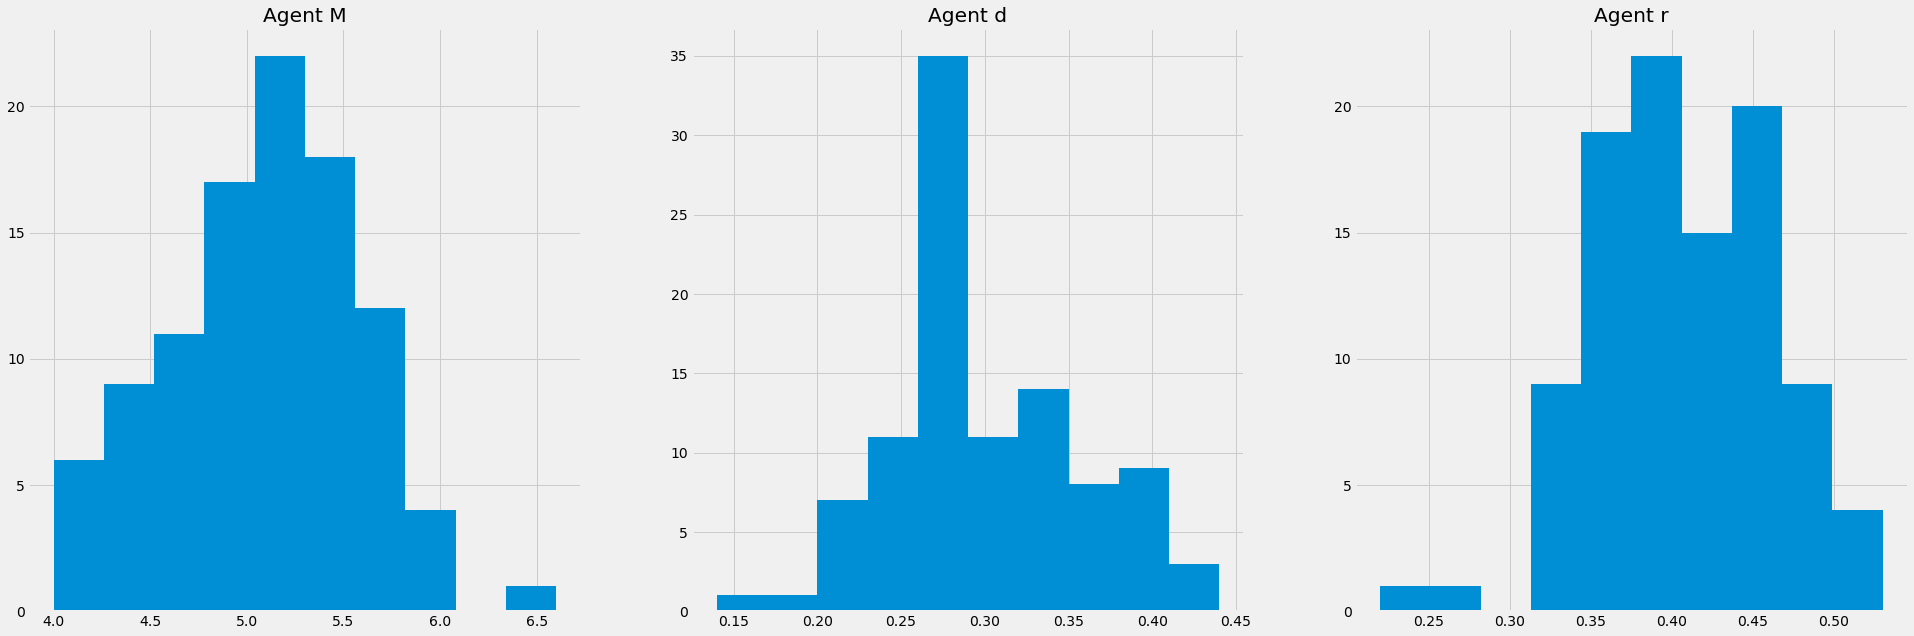

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 3.3, Temptation: 5.1, Sucker: 0, Punishment: 1.9
Agent 1 playing Agent 0: Reward: 3.7, Temptation: 5.7, Sucker: 0, Punishment: 2.0
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 3.3, Temptation: 5.2, Sucker: 0, Punishment: 1.9
Agent 2 playing Agent 0: Reward: 3.6, Temptation: 5.3, Sucker: 0, Punishment: 1.7
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 3.1, Temptation: 4.8, Sucker: 0, Punishment: 1.8
Agent 3 playing Agent 0: Reward: 3.4, Temptation: 5.4, Sucker: 0, Punishment: 2.1
____________________________________________________________________________________________________
Agent 0 playing Agent 4: Reward: 3.4, Temptation: 5.3, Sucker: 0, Punishment: 1.9
Agent 4 playing Agent 

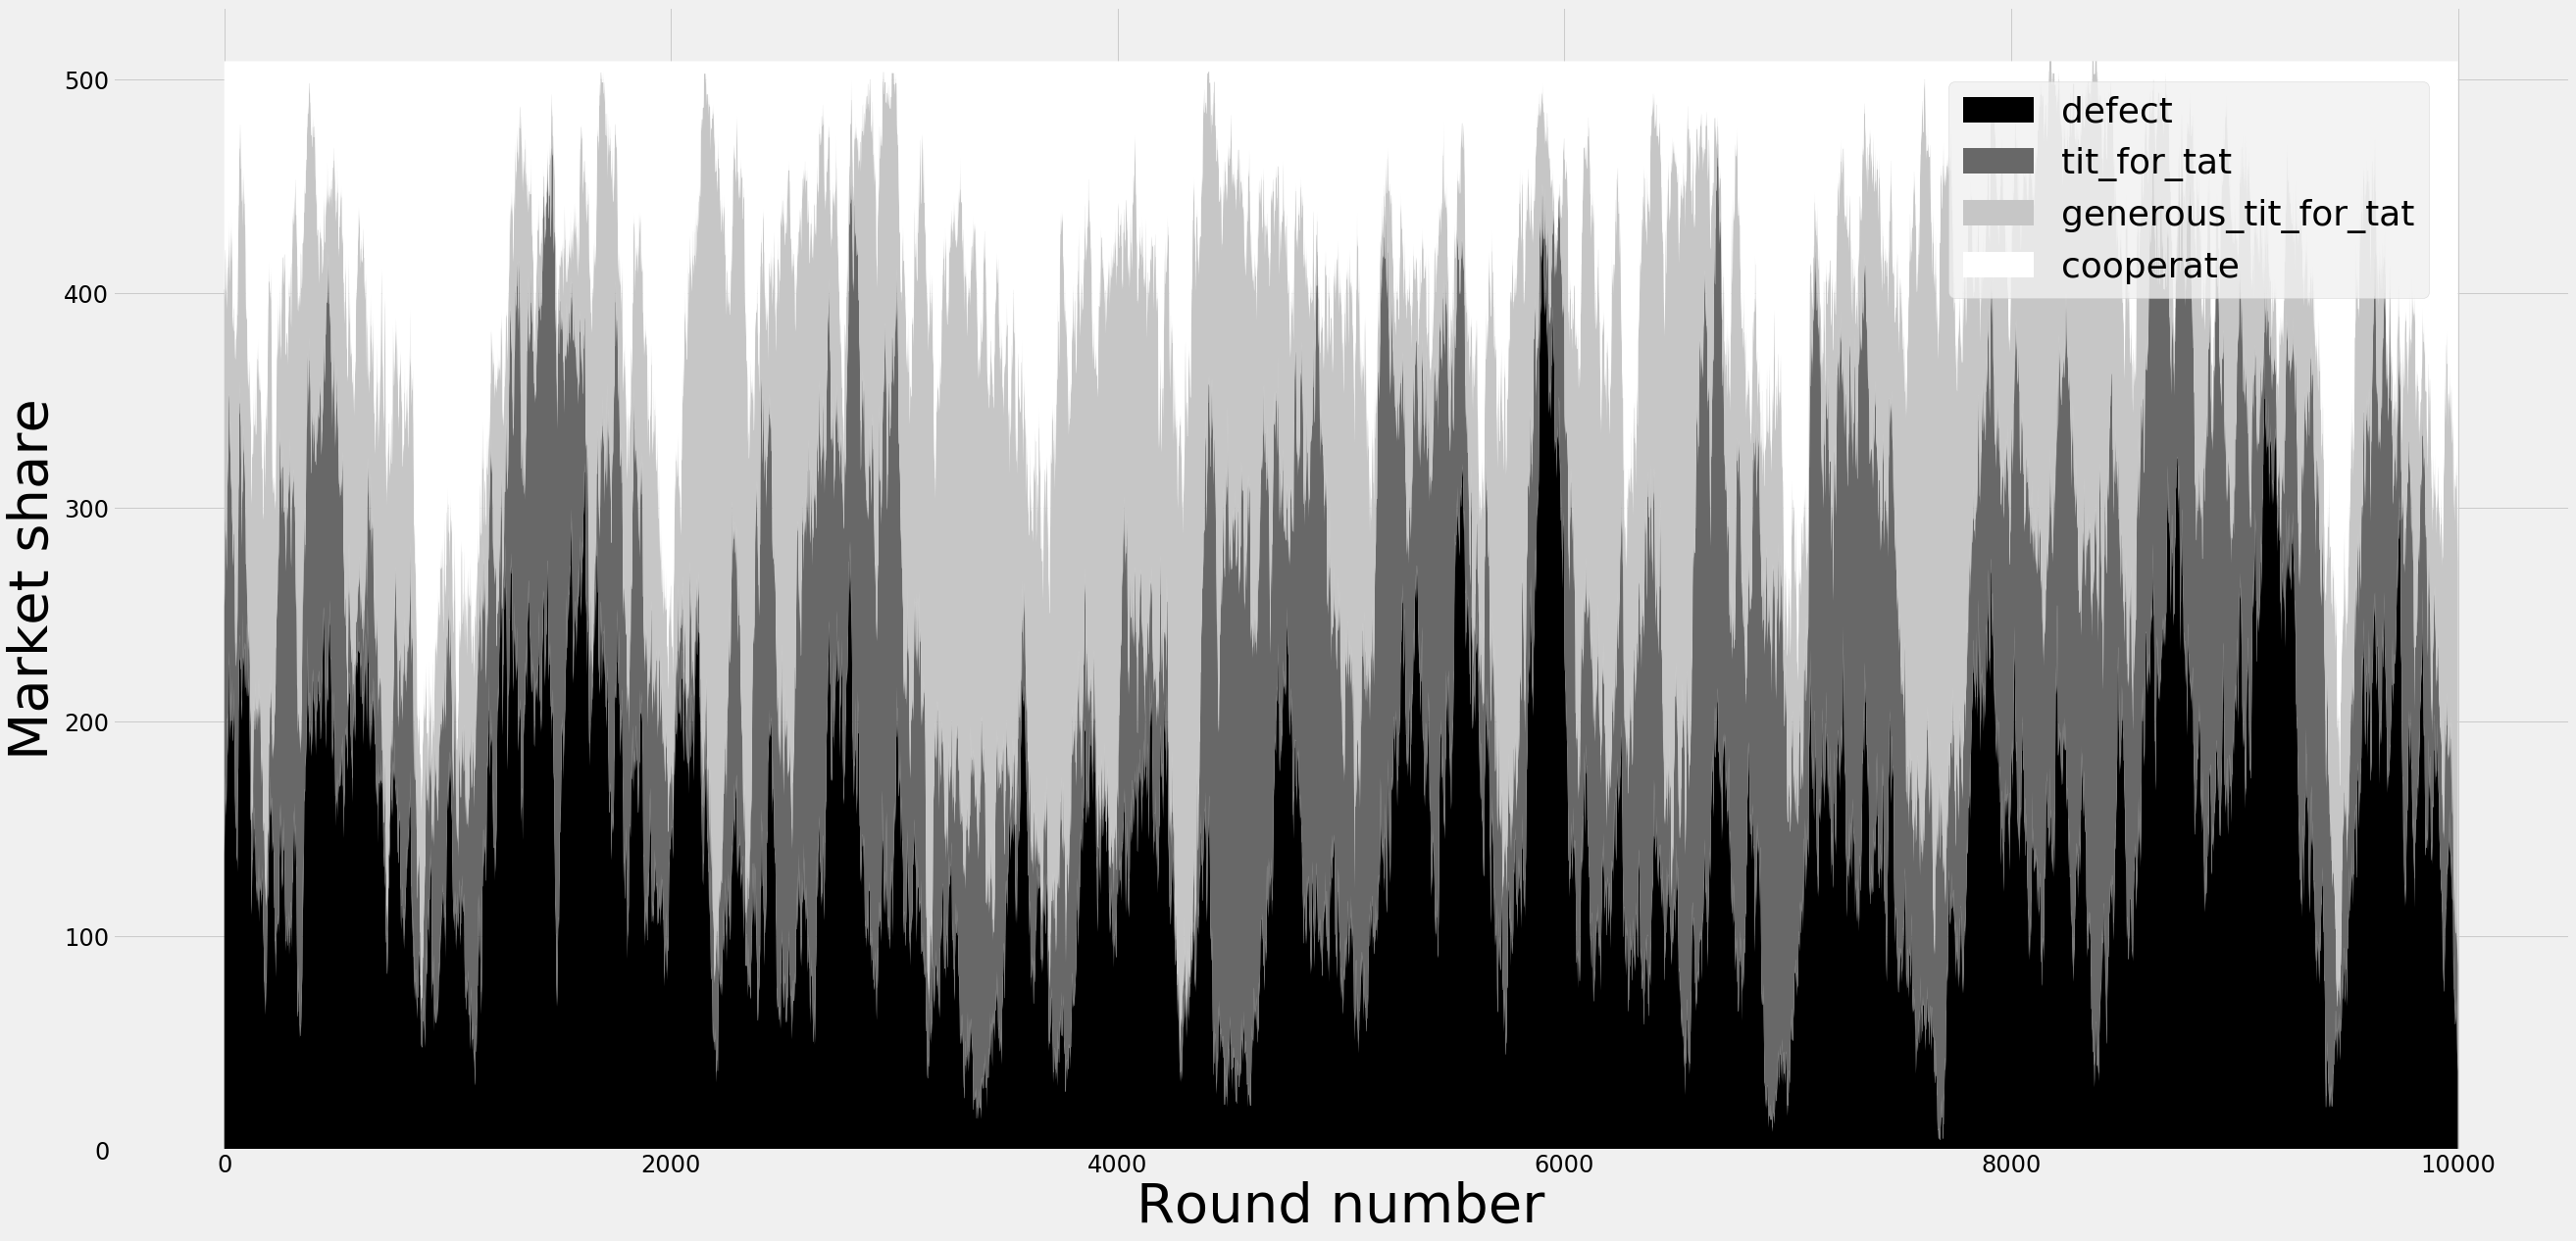

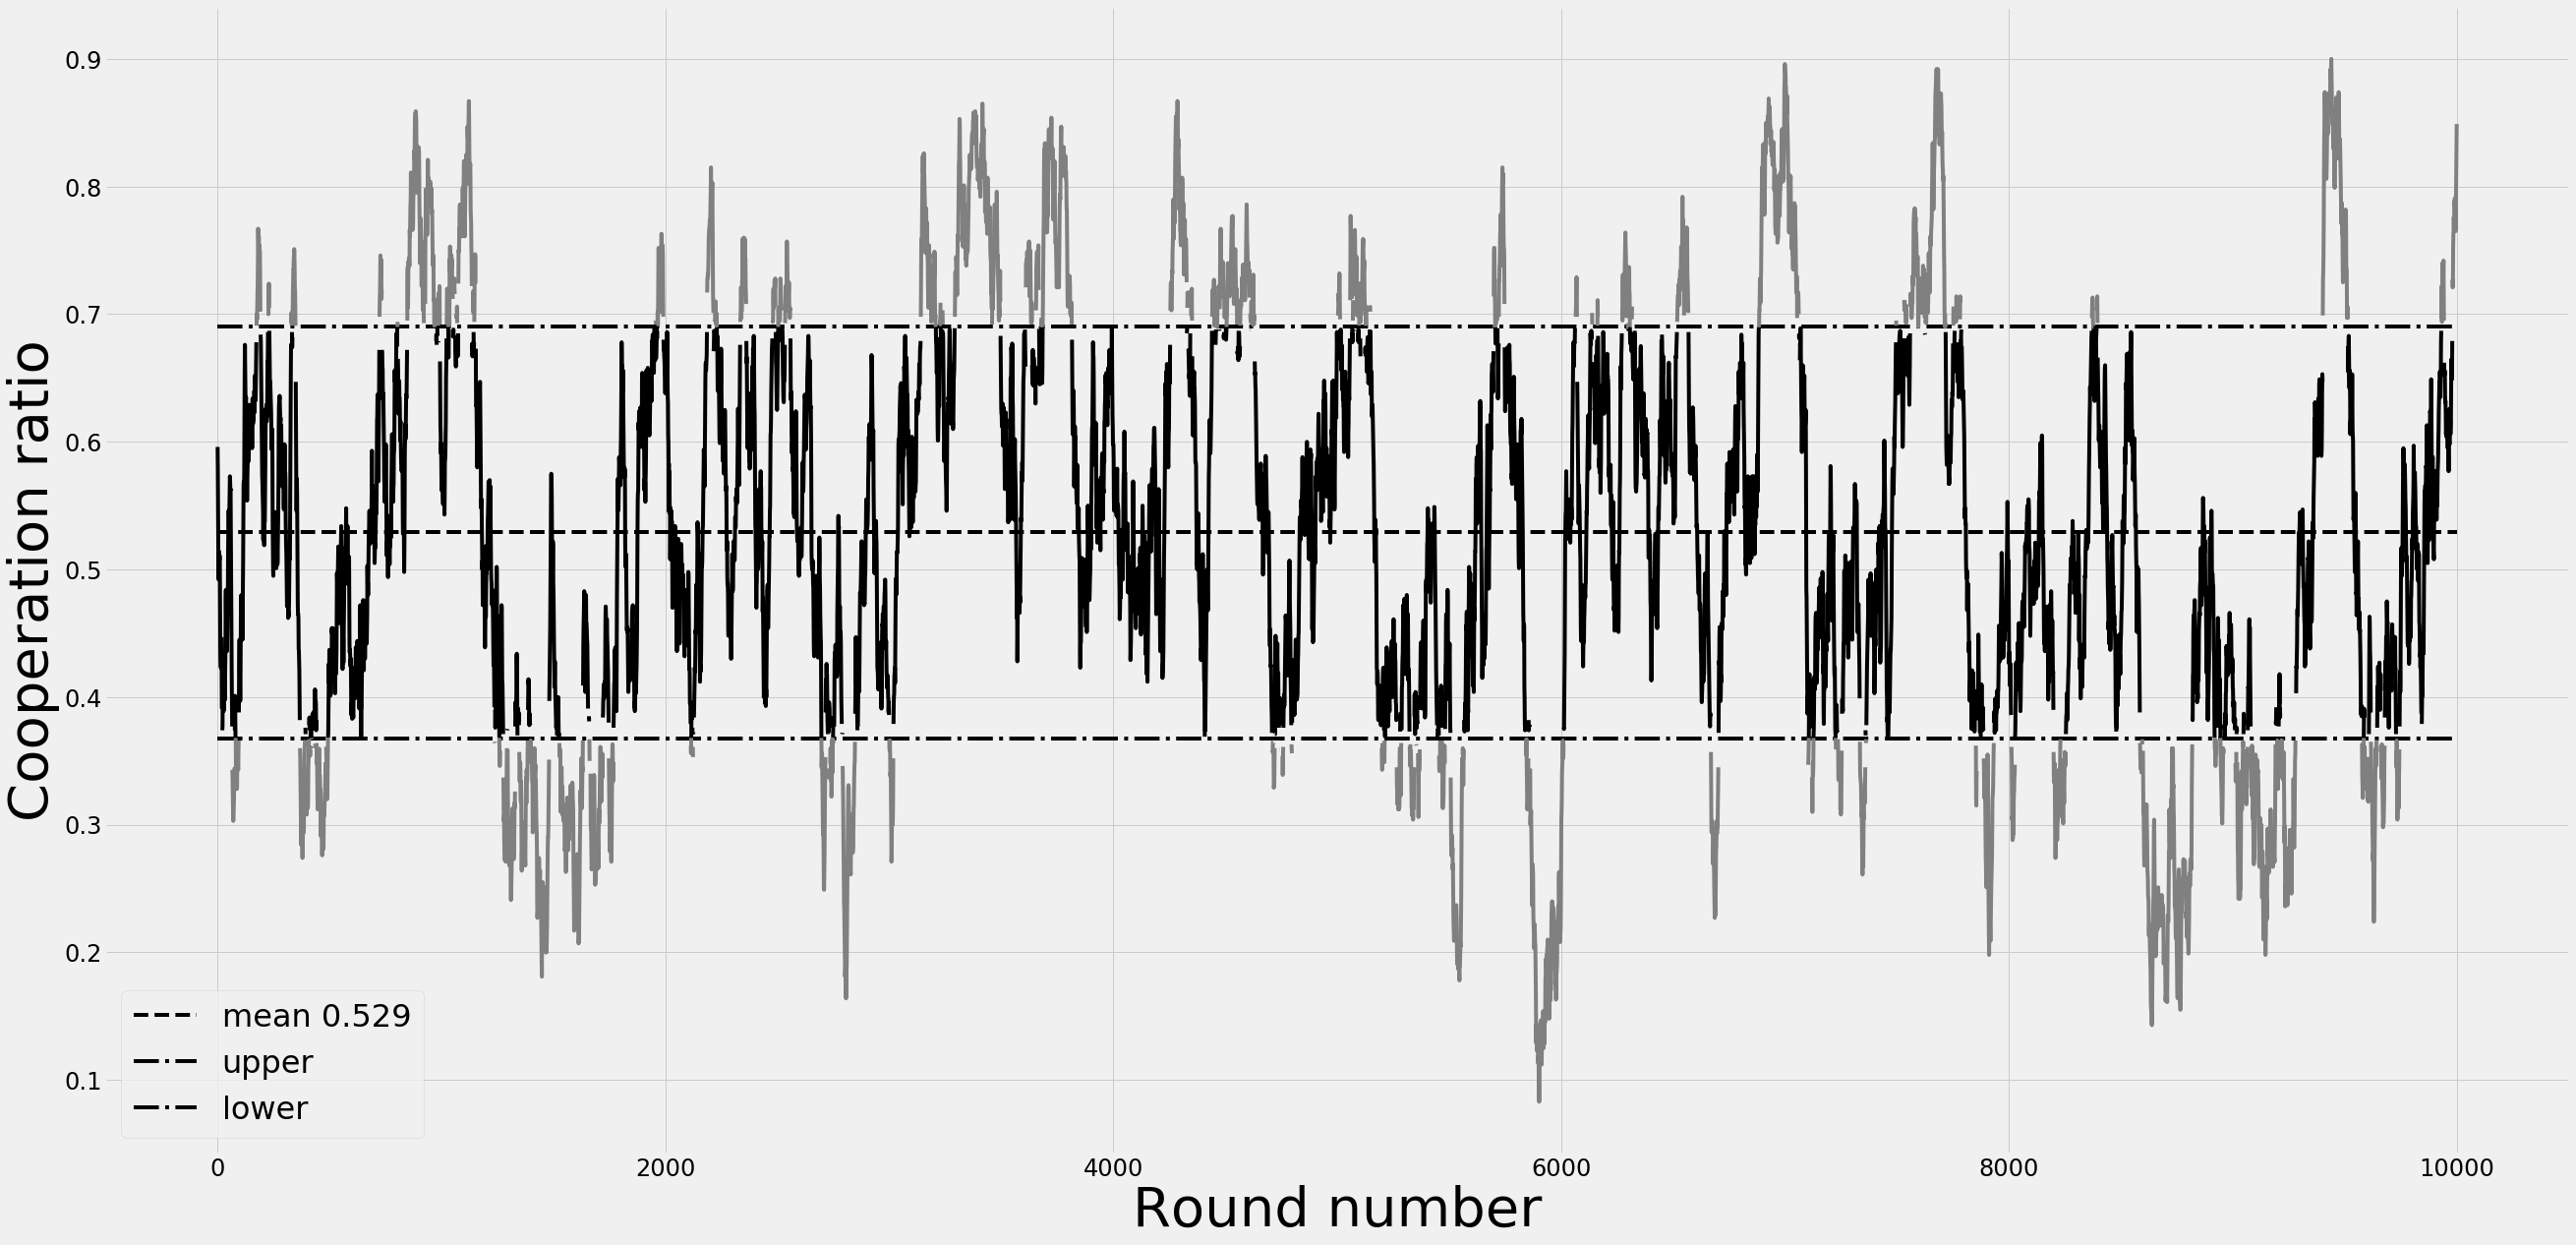

In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 1024
np.random.seed(seed)

tour_type = "hetero_mdr_sd_min"
M = [5, 0.5]
R = [0.4, 0.05]
D = [0.3, 0.05]

agents = get_agents(homogenous = False, M = M, R = R, D = D)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)

tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("data/outliers/" + str(seed) + "_outlier_counts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, seed = str(seed), tour_type = tour_type)